# 資料科學家養成全書 ch10 機器學習-非監督式學習

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 聚類分析 K-means

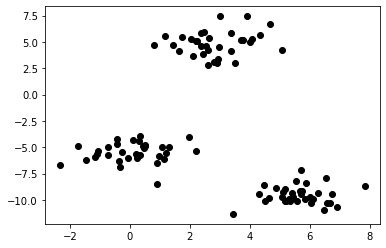

In [2]:
#生成範例資料
from sklearn.datasets import make_blobs
# make_blobs會回傳2個值，不用的那個以_接收
X,_ = make_blobs(random_state=10)

plt.scatter(X[:,0], X[:,1], color='black')

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='random', n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

In [4]:
#將X, y_pred結合在一起
merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1','feature2','cluster']
merge_data.head()

,feature1,feature2,cluster
0,-2.324963,-6.699996,0
1,0.518568,-4.900868,0
2,2.443018,3.846526,1
3,5.826623,-9.922593,2
4,2.033002,5.289908,1


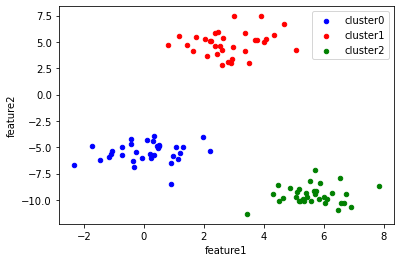

In [5]:
ax = None
colors = ['blue','red','green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i], label=f'cluster{i}', ax=ax)

#### 讀取資料

In [6]:
import requests, zipfile
import io
zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

bank = pd.read_csv('bank-full.csv', sep=';')
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
bank.shape

(45211, 17)

In [8]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### 資料整理&標準化

In [12]:
from sklearn.preprocessing import StandardScaler
bank_sub = bank[['age','balance','campaign','previous']]
bank_sub.head()

,age,balance,campaign,previous
0,58,2143,1,0
1,44,29,1,0
2,33,2,1,0
3,47,1506,1,0
4,33,1,1,0


In [15]:
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
 3   previous  45211 non-null  int64
dtypes: int64(4)
memory usage: 1.4 MB


In [14]:
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)
bank_sub_std

array([[ 1.60696496,  0.25641925, -0.56935064, -0.25194037],
       [ 0.28852927, -0.43789469, -0.56935064, -0.25194037],
       [-0.74738448, -0.44676247, -0.56935064, -0.25194037],
       ...,
       [ 2.92540065,  1.42959305,  0.72181052,  1.05047333],
       [ 1.51279098, -0.22802402,  0.39902023, -0.25194037],
       [-0.37068857,  0.52836436, -0.24656035,  4.52357654]])

#### k-means

In [16]:
# KMeans類別的初始化
kmeans = KMeans(init='random',n_clusters=6, random_state=0)
# 計算群體的重心
kmeans.fit(bank_sub_std)
# 將群體編號轉換為 pandas Series物件
labels = pd.Series(kmeans.labels_, name='cluster_number')
# 顯示群體編號與件數
print(labels.value_counts(sort=False))

0    14406
1    23608
2     3842
3     1373
4     1282
5      700
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

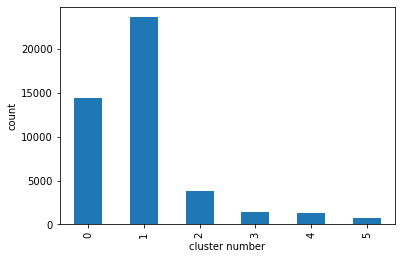

In [17]:
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

手肘法：計算群體重心點與群體所屬的各點距離的總和，若持續增加群體數量的過程中，觀察距離總和下降的程度來得出理想的群體數量為界線。

Text(0, 0.5, 'Distortion')

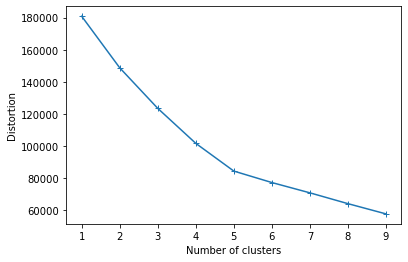

In [18]:
dist_list = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(bank_sub_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

群體數量自5~6之間減少的幅度斜率改變，距離減少的幅度稍微降低，預計分為6類。

**輪廓係數(Silhouette Coefficiency)**
反映數據聚類結果一致性的方法，可以用於評估聚類後簇與簇之間的離散程度。取值範圍為[-1, +1]，如果某一樣本的輪廓接近1，則說明樣本聚類結果合理；如果接近-1，則說明其更應該分類到其他的簇；如果輪廓近似為0，則說明該樣本在兩個簇的邊界上。所有樣本輪廓的均值稱為聚類結果的輪廓係數。

In [24]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(init='random',n_clusters=6, random_state=0).fit(bank_sub_std)
silhouette_score(bank_sub_std, kmeans.labels_)

0.38235866780217326

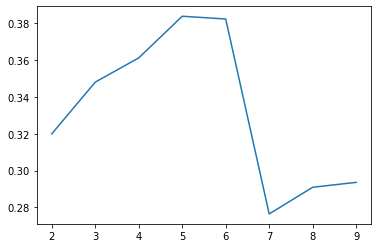

In [26]:
silhouette_avg = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0).fit(bank_sub_std)
    silhouette_avg.append(silhouette_score(bank_sub_std, kmeans.labels_))

plt.plot(range(2,10), silhouette_avg)

看圖可知，分2~9類中，分成5或6類輪廓係數較高，是較合適的分群數量。

#### 分群後結果

In [37]:
kmeans = KMeans(init='random',n_clusters=6, random_state=0)
kmeans.fit(bank_sub_std)
labels = pd.Series(kmeans.labels_, name='cluster_number')
print(labels.value_counts(sort=False))

0    14406
1    23608
2     3842
3     1373
4     1282
5      700
Name: cluster_number, dtype: int64


In [38]:
#結合原始資料與群體編號的資料
bank_with_cluster = pd.concat([bank,labels],axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [39]:
# 利用年齡層分割資料
bins = [15,20,25,30,35,40,45,50,55,60,65,100]
qcut_age = pd.cut(bank_with_cluster['age'], bins, right=False)
df = pd.concat([bank_with_cluster['cluster_number'],qcut_age],axis=1)
df.head()

,cluster_number,age
0,0,"[55, 60)"
1,0,"[40, 45)"
2,1,"[30, 35)"
3,0,"[45, 50)"
4,1,"[30, 35)"


In [40]:
cross_cluster_age = df.groupby(['cluster_number','age']).size().unstack().fillna(0)
cross_cluster_age

age,"[15, 20)","[20, 25)","[25, 30)","[30, 35)","[35, 40)","[40, 45)","[45, 50)","[50, 55)","[55, 60)","[60, 65)","[65, 100)"
cluster_number,,,,,,,,,,,
0,0,0,0,0,0,1023,4490,3833,3475,850,735
1,45,705,3965,8221,6731,3941,0,0,0,0,0
2,1,20,230,788,956,718,598,328,170,29,4
3,0,20,129,327,306,186,145,117,71,38,34
4,0,11,74,240,219,203,156,140,155,48,36
5,1,6,66,164,137,114,81,70,51,9,1


In [41]:
pd.value_counts(qcut_age)

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='cluster_number'>

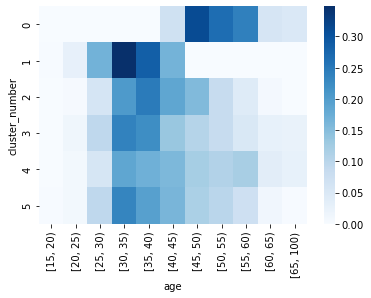

In [42]:
sns.heatmap(cross_cluster_age.apply(lambda x: x/x.sum(),axis=1), cmap='Blues')

可看出0群體中45~50歲比例偏高，1群體中30~35歲比例偏高，可說是有特定年齡偏向。

In [43]:
del bank, bank_sub, bank_sub_std, bank_with_cluster, kmeans, labels, qcut_age, silhouette_avg

## 主成分分析 Principal components analysis，PCA

在盡可能不失去原本資料所持有的資訊條件下壓縮變數的數量，廣泛用於探索性分析的預處理與建構預測模型時的預處理。
它利用正交轉換來對一系列可能相關的變數的觀測值進行線性轉換，從而投影為一系列線性不相關變數的值，這些不相關變數稱為主成分（Principal Components）。具體地，主成分可以看做一個線性方程式，其包含一系列線性係數來指示投影方向。PCA對原始數據的正則化或預處理敏感（相對縮放）。

#### 讀取資料

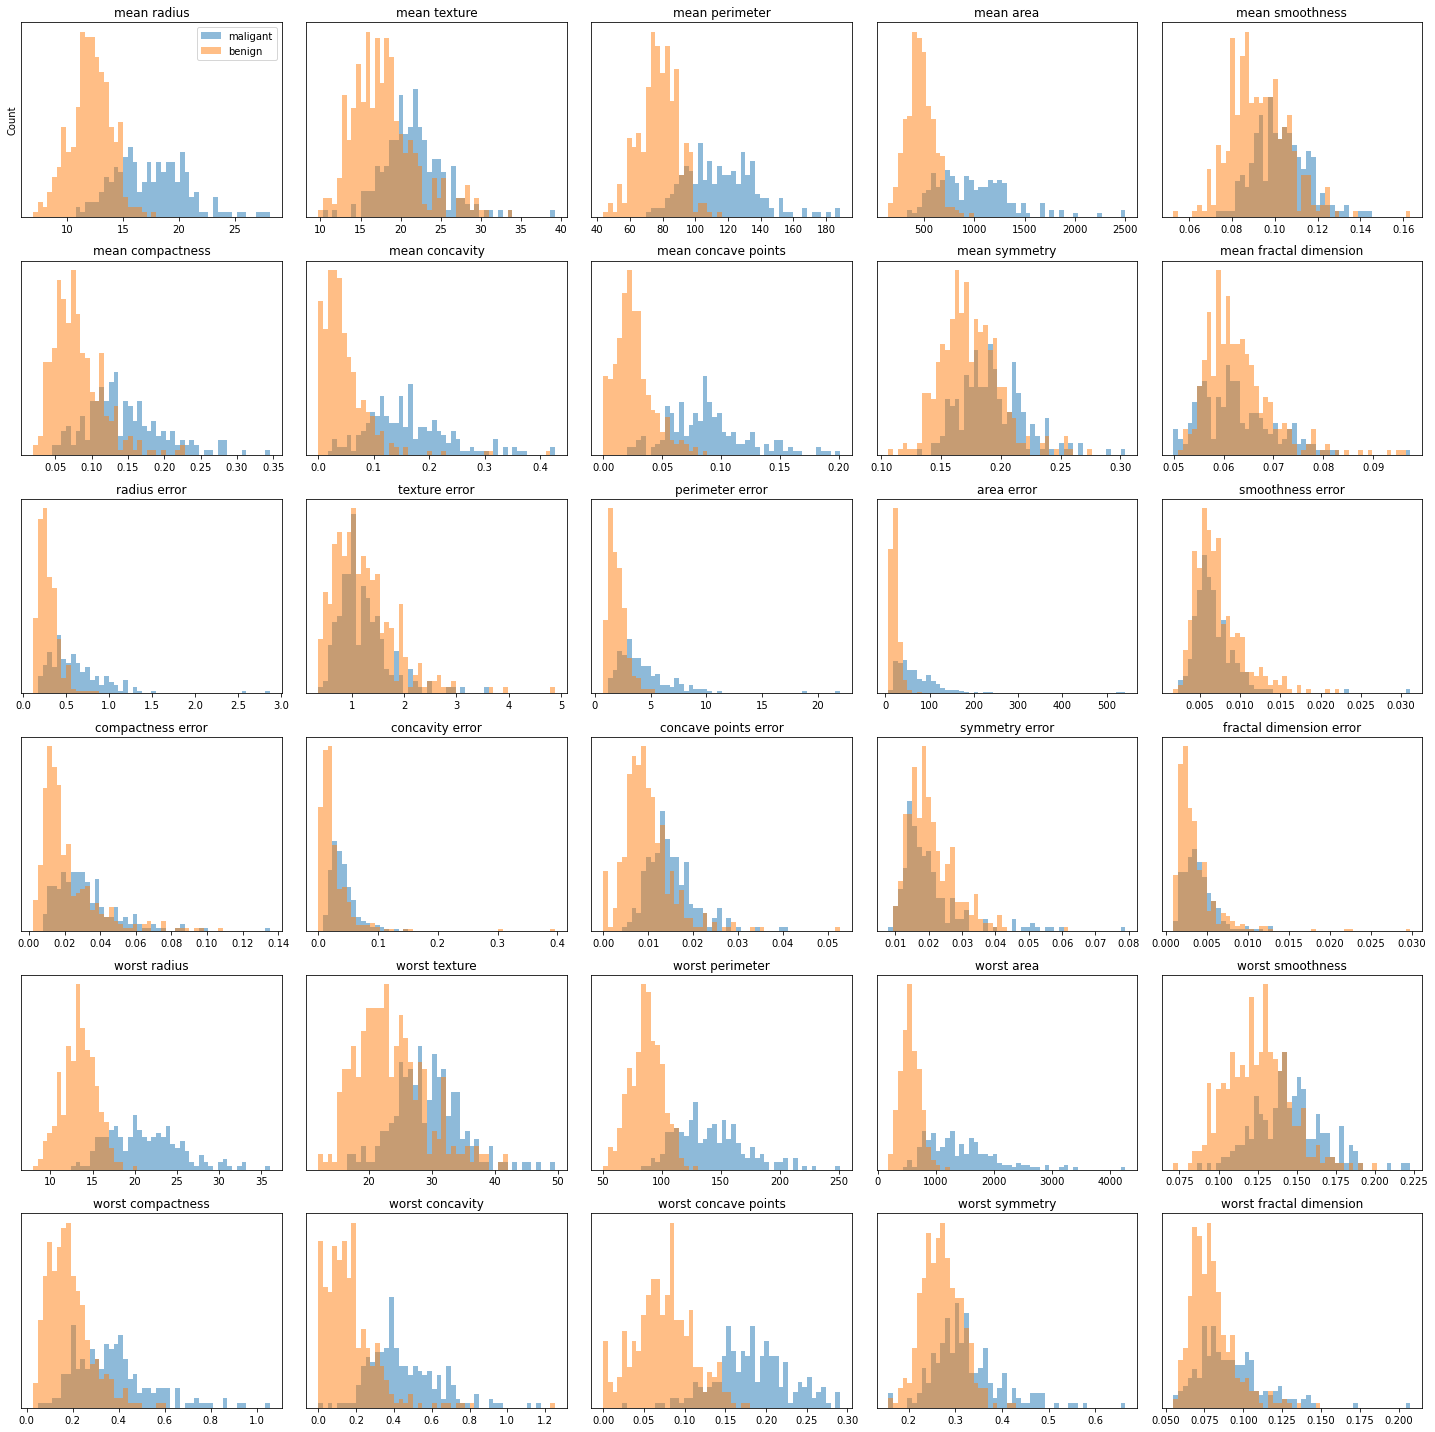

In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

#將資料分為 maligant(惡性)與 benign (良性)的過濾處理
maligant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

# maligant為藍色，benign為橘色之直方圖
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(maligant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_ylabel('Count')
ax[0].legend(['maligant','benign'], loc='best')
fig.tight_layout()

削減20個變數的維度，將主成分的數量，即參數 n_components設定為2

In [48]:
sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

#主成分分析
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_std)

#特徵向量
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [49]:
#表現各個主成分的變異數
pca.explained_variance_

array([13.30499079,  5.7013746 ])

In [50]:
#表現個主成分持有的變異數比例
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

原始資料 x 特徵向量 = 主成分

In [51]:
X_pca = pca.transform(X_std)
X_pca.shape

(569, 2)

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

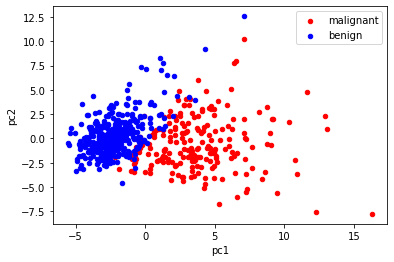

In [52]:
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)
#分離惡性與良性
pca_malignant = X_pca[X_pca['target'] == 0]
pca_benign = X_pca[X_pca['target'] == 1]
#惡性
ax = pca_malignant.plot.scatter(x='pc1',y='pc2',color='red',label='malignant')
pca_benign.plot.scatter(x='pc1',y='pc2',color='blue',label='benign',ax=ax)

## 購物籃分析

In [56]:
trans = pd.read_excel('Online-Retail.xlsx', sheet_name='Online Retail')
trans.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [57]:
trans['cancel_flg'] = trans['InvoiceNo'].map(lambda x: str(x)[0])
trans.groupby('cancel_flg').size()

cancel_flg
5    532618
A         3
C      9288
dtype: int64

In [58]:
trans = trans[(trans['cancel_flg'] == '5') & (trans['CustomerID'].notnull())]
trans.shape

(397924, 9)

In [60]:
trans['StockCode'].value_counts().head(5)

85123A    2035
22423     1724
85099B    1618
84879     1408
47566     1397
Name: StockCode, dtype: int64

**支持度**

A商品與B商品一起賣出的購物籃數量，以及佔全體當中的比例。

In [62]:
#將所有的 InvoiceNo抽出為 trans_all
trans_all = set(trans['InvoiceNo'])
print(len(trans_all))

#將購買商品85123A的資料抽出為 trans_a
trans_a = set(trans[trans['StockCode'] == '85123A']['InvoiceNo'])
print(len(trans_a))

#將購買商品85099B的資料抽出為 trans_b
trans_b = set(trans[trans['StockCode'] == '85099B']['InvoiceNo'])
print(len(trans_b))

#將購買商品85123A與商品85099B的資料抽出為 trans_ab
trans_ab = trans_a & trans_b
print(len(trans_ab))

print(f'含有兩商品的購物籃數量為: {len(trans_ab)}')
print(f'含有兩商品的購物籃佔全體的比例為: {len(trans_ab)/len(trans_all)}')

18536
1978
1600
252
含有兩商品的購物籃數量為: 252
含有兩商品的購物籃佔全體的比例為: 0.013595166163141994


**可信度**

基於某商品A的購買數量，表現該商品A與商品B組合購買的佔了其中多少比例，可信度高並可預估商品容易一起賣，可運用於想進行交叉銷售等情況。
一般會連同增益度一起考慮，以免誤判商品一起銷售的傾向。

In [63]:
print(f'購買商品85123A也購買商品85099B的可信度: {len(trans_ab)/len(trans_a)}')
print(f'購買商品85099B也購買商品85123A的可信度: {len(trans_ab)/len(trans_b)}')

購買商品85123A也購買商品85099B的可信度: 0.12740141557128412
購買商品85099B也購買商品85123A的可信度: 0.1575


**增益值**

購買商品A也購買商品B的增益值 = 可信度除以商品B的支持度；若比1大則表示是很容易一起銷售的商品，比1小則是不容易一起銷售。

In [64]:
support_b = len(trans_b) / len(trans_all)
confidence = len(trans_ab) / len(trans_a)
lift = confidence / support_b
print(lift)

1.4759453993933265
